### 목표 설정
- 네이버 영화 리뷰 데이터셋을 이용해서 긍정/부정을 판별하는 분류기를 만들어보자.
- TF-IDF 방법을 이용해서 토큰화를 진행해보자.
- Konlpy 한국어 형태소 분석기를 이용해보자.
- 단어별 긍정/부정 정보를 시각화 해보자.

In [1]:
# 내 컴퓨터가 구글 컴퓨터 어느곳에 연결되서 위치하는지 확인.
# 내 현재위치 확인
!pwd

/content


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/SW엔지니어

/content/drive/MyDrive/Colab Notebooks/SW엔지니어


In [5]:
!pwd

/content/drive/MyDrive/Colab Notebooks/SW엔지니어


In [6]:
# 필요한 라이브러리 불러오기
import pandas as pd


In [7]:
train = pd.read_csv('./data/ratings_train.csv', encoding='utf8')

In [8]:
train.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [9]:
test = pd.read_csv('./data/ratings_test.csv', encoding='utf8')

In [10]:
test.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [13]:
# 결측치 확인
train[train['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [14]:
test[test['document'].isnull()]

,id,document,label
5746,402110,NaN,1
7899,5026896,NaN,0
27097,511097,NaN,1


In [15]:
# .dropna : 결측치가 있는 행을 삭제해주는 함수
train.dropna(inplace = True)
test.dropna(inplace = True)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149995 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149995 non-null  int64 
 1   document  149995 non-null  object
 2   label     149995 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        49997 non-null  int64 
 1   document  49997 non-null  object
 2   label     49997 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [18]:
train

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [19]:
# document 데이터를 문제 데이터로 label 데이터를 정답 데이터로 지정.

In [20]:
# 학습데이터의 정답데이터
train['label']

,label
0,0
1,1
2,0
3,0
4,1
...,...
149995,0
149996,1
149997,0
149998,1


In [21]:
# 학습데이터의 문제데이터
train['document']

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다
3,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정
4,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
...,...
149995,인간이 문제지.. 소는 뭔죄인가..
149996,평점이 너무 낮아서...
149997,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?
149998,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상


In [22]:
# 평가데이터의 정답데이터
test['label']

,label
0,1
1,0
2,0
3,0
4,0
...,...
49995,1
49996,0
49997,0
49998,0


In [23]:
#평가데이터의 문제데이터
test['document']

,document
0,굳 ㅋ
1,GDNTOPCLASSINTHECLUB
2,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아
3,지루하지는 않은데 완전 막장임... 돈주고 보기에는....
4,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??
...,...
49995,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함
49996,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO
49997,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다
49998,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네


In [24]:
# train/test 데이터셋에서 문제데이터 / 정답데이터 지정

# X : 문제
# y : 정답
# train : 훈련데이터
# test : 평가(테스트)

# 문제 데이터
X_train = train['document']
X_test = test['document']
# 정답 데이터
y_train = train['label']
y_test = test['label']


In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((149995,), (49997,), (149995,), (49997,))

### 토큰화
vectorizer
- vectorizer는 대상을 벡터화 시켜주는 도구
- 벡터화 : 텍스트나 이미지처럼 '비수치적'인 데이터를 숫자 배열(벡터)로 바꾸는 과정.
- 기계 학습 분야에서 주로 텍스트 데이터를 분석하기 위해서
- 여러 머신러닝/ 딥러닝 모델을 학습시키기 위해서는 텍스트나 다른 형태의 데이터를 벡터화 / 수치화 할 필요가 있다.

### BOW(Bag Of Word) - 단어가방
- 문서를 벡터로 변환하는 가장 기본적인 방법
- 문서내의 모든 단어를 모아서 가방안에 넣고, 어떤 단어가 들어있는지 리스트/ 딕셔너리 형태로 '순서-숫자'로 나타내는 방법

In [26]:
# TF-IDF 기법 사용
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
# TF-IDF 벡터라이저 사용
# 객체 생성
tfidf = TfidfVectorizer()

# 단어 사전 구축
tfidf.fit(X_train[:3]) # fit : 학습시키다

TfidfVectorizer()

In [28]:
# 분리된 단어로 만든 단어사전
tfidf.vocabulary_
# 띄어쓰기 기준

{'더빙': 2,
 '진짜': 6,
 '짜증나네요': 7,
 '목소리': 3,
 '포스터보고': 9,
 '초딩영화줄': 8,
 '오버연기조차': 5,
 '가볍지': 0,
 '않구나': 4,
 '너무재밓었다그래서보는것을추천한다': 1}

In [29]:
temp = TfidfVectorizer()

sugar = '설탕국수를 먹었다.'

#단어사전 구축
temp.fit([sugar])
temp.vocabulary_

{'설탕국수를': 1, '먹었다': 0}

TF-IDF Vectorizer는 기본적으로 어절 단위(문장을 이루는 토막)으로 끊어주기 때문에 한국어 특성상 파악이 어렵다.
- 더 작은 형태소 별로 나눠서 파악해야 한다.

## 한국어 형태소 분석기 사용
- 한국어 특성에 맞춰 개발된 분석기

In [30]:
# 라이브러리
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 29.3 MB/s eta 0:00:00


In [31]:
# 형태소 분석기 불러오기
from konlpy.tag import Kkma

### Kkma(꼬꼬마)
- 서울대학교 IDS 연구실에서 개발

In [32]:
# 꼬꼬마 객체 생성
kkma = Kkma()

In [33]:
kkma.nouns(sugar)

['설탕', '설탕국수', '국수']

### Kkma에서 사용하는 대표적 함수
- nouns() : 명사 추출 함수
- morphs() : 형태소 추출
- pos() : 형태소 추출 + 품사 태그

In [34]:
# tfidf + Kkma 명사 추출기 연결해서 사용해보기
# tf-idf Vectorizer에 연결하기 위해서, 명사 추출기를 함수화
def myTokenizer(text):
  return kkma.nouns(text)

In [35]:
X_train[0:3]

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다


In [36]:
# tfidf = TfidfVectorizer()

tfidf_nouns = TfidfVectorizer(tokenizer=myTokenizer)

# 적용/학습
tfidf_nouns.fit(X_train[0:3])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function myTokenizer at 0x788c8fbbd800>)

In [37]:
# 단어사전 확인
tfidf_nouns.vocabulary_

{'더빙': 0,
 '목소리': 2,
 '흠': 17,
 '포스터': 15,
 '포스터보고': 16,
 '보고': 4,
 '초': 12,
 '초딩영화줄': 13,
 '딩': 1,
 '영화': 6,
 '줄': 11,
 '오버': 7,
 '오버연기': 8,
 '연기': 5,
 '재': 9,
 '재밓': 10,
 '밓': 3,
 '추천': 14}

In [38]:
X_train[0]

'아 더빙.. 진짜 짜증나네요 목소리'

In [39]:
# 형태소 추출
kkma.morphs(X_train[0])

['아', '아', '더빙', '..', '진짜', '짜증나', '네요', '목소리']

In [40]:
# 품사 태그 종류 출력해보기
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [41]:
# 우리가 지금 진행하고 있는 분석 감성 분류 분석(긍정 / 부정)
# 감성분석에서는 동사 / 형용사 / 보통명사를 많이 사용한다.

In [42]:
data = '러시아 월드컴에서 콩국수를 먹던데 굉장히 신기하고 나도 콩국수가 먹고 싶어졌다'

In [43]:
kkma.pos(data)

[('러시아', 'NNG'),
 ('월드', 'NNP'),
 ('컴', 'NNP'),
 ('에서', 'JKM'),
 ('콩국수', 'NNG'),
 ('를', 'JKO'),
 ('먹', 'VV'),
 ('던데', 'ECD'),
 ('굉장히', 'MAG'),
 ('신기', 'NNG'),
 ('하', 'XSV'),
 ('고', 'ECE'),
 ('나', 'VXV'),
 ('아도', 'ECD'),
 ('콩국수', 'NNG'),
 ('가', 'JKS'),
 ('먹', 'VV'),
 ('고', 'ECE'),
 ('싶', 'VV'),
 ('어', 'ECD'),
 ('지', 'VXV'),
 ('었', 'EPT'),
 ('다', 'EFN')]

In [44]:
# 데잍터프레임화 시켜보기
df = pd.DataFrame(kkma.pos(data), columns=['morphs', 'tag'])
df


,morphs,tag
0,러시아,NNG
1,월드,NNP
2,컴,NNP
3,에서,JKM
4,콩국수,NNG
5,를,JKO
6,먹,VV
7,던데,ECD
8,굉장히,MAG
9,신기,NNG


In [45]:
# 인덱스를 tag로 지정해보자.
df.set_index('tag', inplace=True)
df

,morphs
tag,
NNG,러시아
NNP,월드
NNP,컴
JKM,에서
NNG,콩국수
JKO,를
VV,먹
ECD,던데
MAG,굉장히


In [46]:
# 문장데이터에 우리가 만들어준 토크나이저 적용해보자.

# 적용 준비 단계 - 함수화
def myTokenizer2(text):
  # 우리가 필요한 품사만 뽑아보자
  d = pd.DataFrame(kkma.pos(text), columns=['morph', 'tag'])

  # 인덱스를 태그로 지정까지
  d.set_index('tag', inplace=True)

  # 동사, 형용사, 보통명사만 뽑아서 데이터 프레임을 만들어보자
  if ('VV' in d.index) | ('VA' in d.index) | ('NNG' in d.index):
    return d.loc[d.index.isin(['VV', 'VA', 'NNG'])]['morph'].values
  else:
    return []

In [47]:
X_train[0:3]

,document
0,아 더빙.. 진짜 짜증나네요 목소리
1,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
2,너무재밓었다그래서보는것을추천한다


In [48]:
# TF-IDF Vectorizer 에 연결
tfidf_pos = TfidfVectorizer(tokenizer=myTokenizer2)

# 적용/학습
tfidf_pos.fit(X_train[0:3])

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(tokenizer=<function myTokenizer2 at 0x788c6c848720>)

In [49]:
# 단어사전 확인
tfidf_pos.vocabulary_

{'아': 5,
 '더빙': 1,
 '짜증나': 12,
 '목소리': 2,
 '흠': 15,
 '포스터': 14,
 '보고': 4,
 '영화': 8,
 '줄': 11,
 '오버': 9,
 '연기': 7,
 '가볍': 0,
 '재': 10,
 '어': 6,
 '보': 3,
 '추천': 13}

In [50]:
# 실제 데이터를 이용해서 단어사전을 구축해보자
tfidf_final = TfidfVectorizer(tokenizer=myTokenizer2)
# 10000개의 데이터를 이용해서 단어사전 구축을 진행
tfidf_final.fit(X_train[:10000])

TfidfVectorizer(tokenizer=<function myTokenizer2 at 0x788c6c848720>)

In [51]:
# 단어사전 확인
tfidf_final.vocabulary_

{'아': 4671,
 '더빙': 1742,
 '짜증나': 7146,
 '목소리': 2611,
 '흠': 8699,
 '포스터': 8014,
 '보고': 3208,
 '영화': 5271,
 '줄': 6884,
 '오버': 5359,
 '연기': 5172,
 '가볍': 55,
 '재': 6338,
 '어': 4938,
 '보': 3205,
 '추천': 7428,
 '교도소': 693,
 '이야기': 5907,
 '멀': 2477,
 '재미': 6353,
 '없': 5041,
 '점': 6532,
 '조정': 6728,
 '익살': 5974,
 '돋보이': 1829,
 '스파이': 4371,
 '더': 1730,
 '맨': 2450,
 '늙': 1489,
 '보이': 3238,
 '하': 8148,
 '커스틴': 7565,
 '이쁘': 5879,
 '걸음마': 353,
 '떼': 2070,
 '초등학교': 7354,
 '학년': 8209,
 '생인': 3875,
 '용': 5522,
 '별': 3186,
 '반개': 2939,
 '아깝': 4677,
 '원작': 5630,
 '긴장감': 1044,
 '살리': 3740,
 '욕': 5513,
 '나오': 1205,
 '이응': 5925,
 '경': 417,
 '길': 1047,
 '우': 5538,
 '생활': 3882,
 '발': 2969,
 '낫': 1284,
 '납': 1281,
 '감금': 145,
 '반복': 2947,
 '이': 5818,
 '드라마': 1947,
 '가족': 92,
 '사람': 3649,
 '모': 2550,
 '엿': 5233,
 '액션': 4881,
 '있': 6141,
 '안': 4775,
 '평점': 7994,
 '낮': 1289,
 '헐': 8403,
 '우드': 5541,
 '식': 4487,
 '화려': 8540,
 '길들이': 1048,
 '인피': 6036,
 '니트': 1507,
 '짱': 7158,
 '때': 2042,
 '눈물': 1456,
 '나': 1168,
 

In [52]:
# .transform : 텍스트데이터를 벡터화
# 실제 문장을 잘게 쪼개서 수치값으로 바꿔주자

X_train_text = tfidf_final.transform(X_train[:10000])
X_test_text = tfidf_final.transform(X_test[:10000])

In [53]:
X_train_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 72671 stored elements and shape (10000, 8748)>

In [54]:
X_test_text

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 66344 stored elements and shape (10000, 8748)>

### 모델링 단계
- 머신러닝 모델을 이용해서 텍스트 분석을 진행

In [55]:
# Logistic 회귀 모형 import
from sklearn.linear_model import LogisticRegression

In [56]:
# 로지스틱 회귀 객체 생성
logi = LogisticRegression()

In [57]:
X_train.shape, y_train.shape

((149995,), (149995,))

In [58]:
X_train_text.shape, X_test_text.shape

((10000, 8748), (10000, 8748))

In [59]:
# 로지스틱 회귀모형 학습
logi.fit(X_train_text, y_train[:10000])

LogisticRegression()

In [60]:
# train 데이터에서 정확도 확인
logi.score(X_train_text, y_train[:10000])

0.8716

In [61]:
# 학습하지 않은 데이터
# test 데이터에서의 정확도
logi.score(X_test_text, y_test[:10000])

0.7838

In [70]:
# logi 활용
# 정답의 구조 : 0(부정적 리뷰) or 1(긍정적 리뷰)

review = [input('리뷰를 입력해주세요 : ')]
target_names = ['부정적 리뷰', '긍정적 리뷰'] # 0 인덱스 접근시 부정, 1 인덱스 접근시 긍정

# 토큰화 변환 진행(모델은 숫자벡터만 이해하기 때문)
vect_review = tfidf_final.transform(review)

# predict_proba
# 클래스에 대한 확률 반환
pro = logi.predict_proba(vect_review) # max() 값으로 더 큰 값을 받아오면 > 신뢰도

# predict
# 하나의 정답(0 또는 1)을 반환
pre = logi.predict(vect_review)

print(f'{review[0]} 문장은 {pro.max()*100:.2f}%로 {target_names[pre[0]]} 리뷰입니다.')

KeyboardInterrupt: Interrupted by user

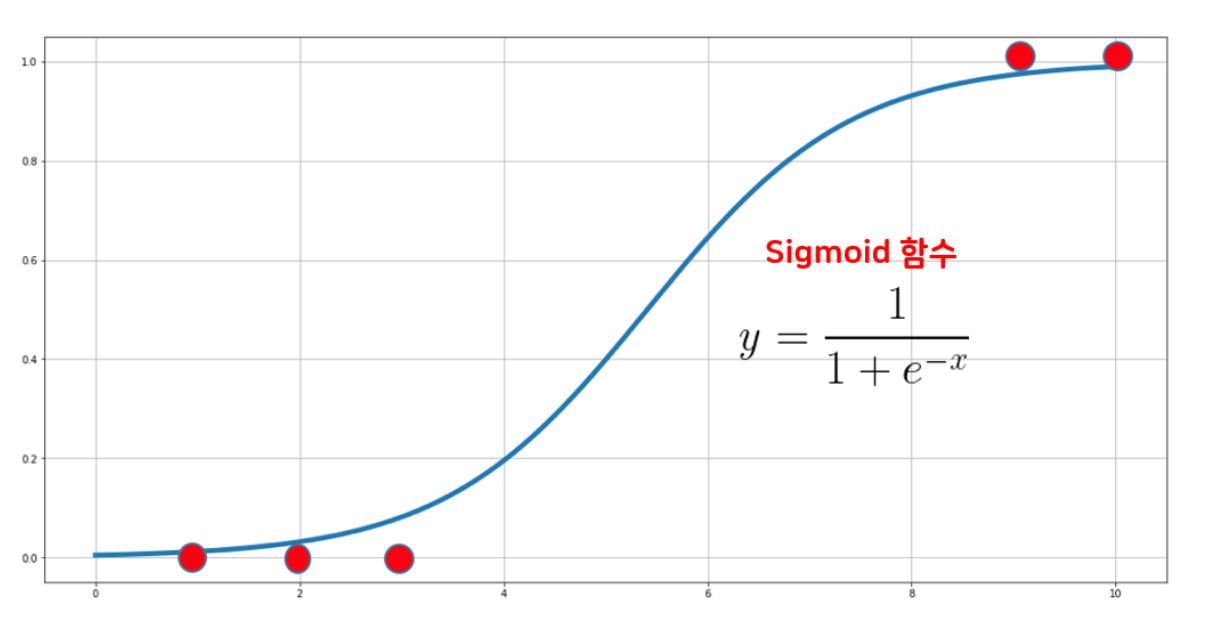

### 문장을 입력받아 긍정과 부정을 구분하는 원리에 대해 알아보자

In [71]:
# 단어사전 가져오기
tfidf_final.vocabulary_

{'아': 4671,
 '더빙': 1742,
 '짜증나': 7146,
 '목소리': 2611,
 '흠': 8699,
 '포스터': 8014,
 '보고': 3208,
 '영화': 5271,
 '줄': 6884,
 '오버': 5359,
 '연기': 5172,
 '가볍': 55,
 '재': 6338,
 '어': 4938,
 '보': 3205,
 '추천': 7428,
 '교도소': 693,
 '이야기': 5907,
 '멀': 2477,
 '재미': 6353,
 '없': 5041,
 '점': 6532,
 '조정': 6728,
 '익살': 5974,
 '돋보이': 1829,
 '스파이': 4371,
 '더': 1730,
 '맨': 2450,
 '늙': 1489,
 '보이': 3238,
 '하': 8148,
 '커스틴': 7565,
 '이쁘': 5879,
 '걸음마': 353,
 '떼': 2070,
 '초등학교': 7354,
 '학년': 8209,
 '생인': 3875,
 '용': 5522,
 '별': 3186,
 '반개': 2939,
 '아깝': 4677,
 '원작': 5630,
 '긴장감': 1044,
 '살리': 3740,
 '욕': 5513,
 '나오': 1205,
 '이응': 5925,
 '경': 417,
 '길': 1047,
 '우': 5538,
 '생활': 3882,
 '발': 2969,
 '낫': 1284,
 '납': 1281,
 '감금': 145,
 '반복': 2947,
 '이': 5818,
 '드라마': 1947,
 '가족': 92,
 '사람': 3649,
 '모': 2550,
 '엿': 5233,
 '액션': 4881,
 '있': 6141,
 '안': 4775,
 '평점': 7994,
 '낮': 1289,
 '헐': 8403,
 '우드': 5541,
 '식': 4487,
 '화려': 8540,
 '길들이': 1048,
 '인피': 6036,
 '니트': 1507,
 '짱': 7158,
 '때': 2042,
 '눈물': 1456,
 '나': 1168,
 

In [80]:
# 단어사전 정리
voc = pd.DataFrame(tfidf_final.vocabulary_.keys(),
                   index = tfidf_final.vocabulary_.values(),
                   columns = ['word'])
# 가나다순으로 오름차순
voc.sort_index(inplace = True)
voc

,word
0,ㄱ
1,ㄴ
2,ㄷ
3,ㄹ
4,ㅁ
...,...
8743,힘쓰
8744,힘없
8745,힘입
8746,힙합


### 가중치 확인하기

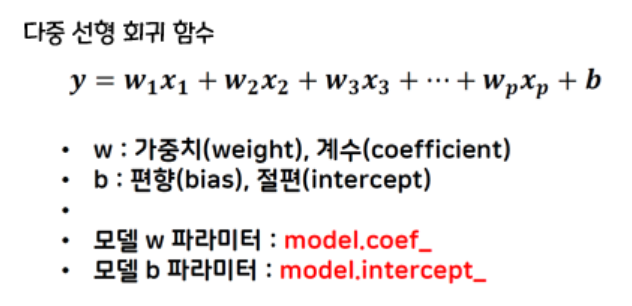

In [82]:
# 가중치 확인
logi.coef_.T

array([[-0.55992069],
       [-0.54155897],
       [ 1.30726422],
       ...,
       [-0.03205394],
       [-0.02770294],
       [ 0.142698  ]])

In [81]:
# DF의 형태로 가중치 확인
learning_result = pd.DataFrame(logi.coef_.T,
                               index=voc.sort_index()['word'],
                               columns=['weight'])
# 값을 기준으로 오름차순
learning_result.sort_values('weight', inplace=True)
learning_result

,weight
word,
재미없,-4.487693
최악,-4.267965
아깝,-4.098824
쓰레기,-4.055906
실망,-3.620450
...,...
좋,3.310072
수작,3.317169
재미있,3.716394


In [83]:
# 나눔 고딕 설치
!sudo apt-get install -y fonts-nanum # 폰트 설치 명령어 (나눔 폰트)
!sudo fc-cache -fv # 폰트 캐시 삭제
!rm ~/.cache/matplotlib -rf # 캐시 삭제

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126332 files and direc

In [84]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') # 폰트 설정

# 마이너스 기호 사용
plt.rcParams['axes.unicode_minus'] = False

<function matplotlib.pyplot.show(close=None, block=None)>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) 

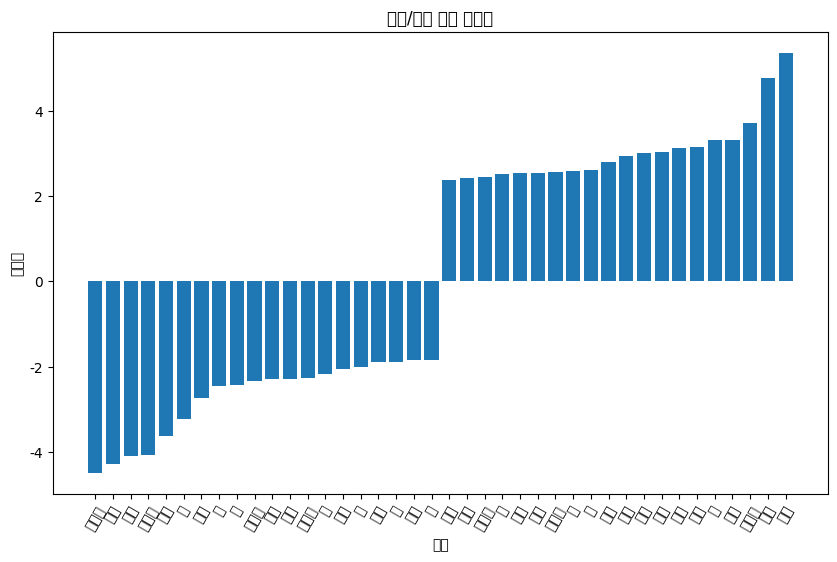

In [90]:
plt.figure(figsize=(10, 6))
plt.title('긍정/부정 단어 가중치')
plt.xlabel('단어')
plt.ylabel('가중치')

plt.bar(top_20.index, top_20['weight'])
plt.xticks(rotation = 60x)

plt.show

In [87]:
# 부정에 영향을 많이 끼친 상위 20단어
bad = learning_result.head(20)
bad

,weight
word,
재미없,-4.487693
최악,-4.267965
아깝,-4.098824
쓰레기,-4.055906
실망,-3.620450
없,-3.221168
유치,-2.730037
돈,-2.457378
노,-2.437519


In [88]:
# 긍정에 영향을 많이 끼친 상위 20단어
good = learning_result.tail(20)
good

,weight
word,
완벽,2.386608
마음,2.411618
감동적,2.444342
재,2.509197
사랑,2.550077
괜찮,2.551224
아름답,2.564656
낮,2.581769
굿,2.610506


In [89]:
# bad, good 병합
top_20 = pd.concat([bad, good])
top_20

,weight
word,
재미없,-4.487693
최악,-4.267965
아깝,-4.098824
쓰레기,-4.055906
실망,-3.620450
없,-3.221168
유치,-2.730037
돈,-2.457378
노,-2.437519
